# Loading the data

In [17]:
gender_data = read.csv("../data/social_genero.csv")
gender_data = gender_data[gender_data$N>100,]
gender_data[1:10,]

,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.468,0.1103315,0.0956015,0.1260355,13967
2,São Paulo,0.474,0.06923765,0.06046832,0.08189227,12291
3,Belo Horizonte,0.469,0.08681341,0.07481126,0.1047766,4861
4,Porto Alegre,0.464,0.09200196,0.0769549,0.1139241,4076
5,São Bernardo do Campo,0.483,0.1388227,0.1252115,0.1595197,2939
6,Curitiba,0.477,0.086121,0.06535142,0.1144781,2810
7,Brasília,0.478,0.1049815,0.09445746,0.1167247,2429
8,Recife,0.462,0.08801415,0.07674597,0.1033403,2261
9,Fortaleza,0.468,0.09837134,0.08342362,0.120915,1535
10,Goiânia,0.477,0.07515234,0.07344633,0.0777027,1477


# Notation and Variables

* Y = % of male citizens in city
* X = % of users who publish positive posts about Dilma
* W1 = % of male who publish positive posts about Dilma
* W2 = % of female who publish positive posts about Dilma
* N = Number of people sampled

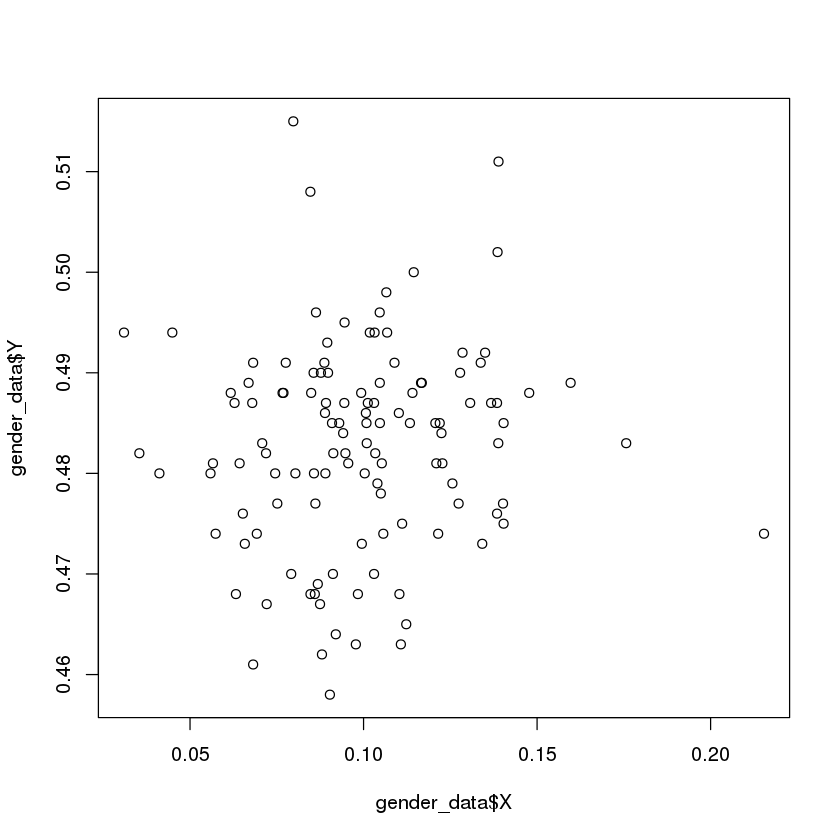

In [32]:
plot(gender_data$X, gender_data$Y)

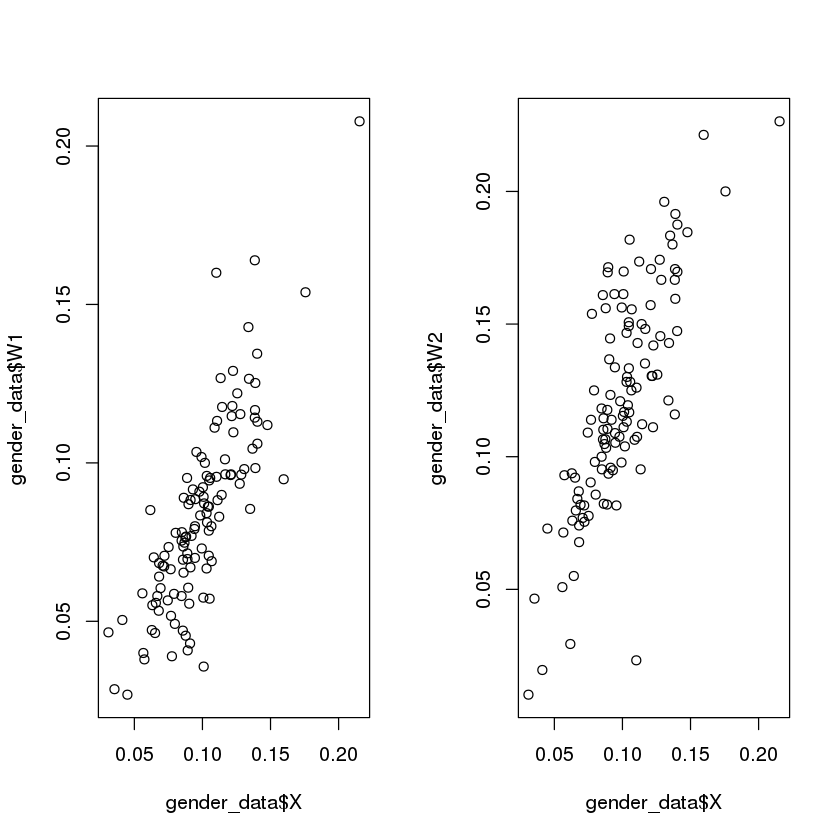

In [31]:
par(mfrow=c(1,2))
plot(gender_data$X, gender_data$W1)
plot(gender_data$X, gender_data$W2)